# Memprediksi Harga Tiket Pesawat dengan Algoritma KNN Regressor, Decision Tree Regression, dan Random Forest Regressor

## KKL Data Sains Prodi Fisika UNJ Bersama Bisa AI

- Nama     : Abdullah Mu'adz Muflih
- NIM      : 1306620078
- Instansi : Universitas Negeri Jakarta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

## 1. Statistika Deskriptif

In [2]:
#Load data dari csv
df = pd.read_excel('Airplane Ticket Prize_Data.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
display(df.describe())

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## 2. Handling Missing Value dan Cleaning data

### Fitur pada data
- Terdapat 11 kolom pada data :


        Airline          : Nama maskapai
        Date_of_Journey  : Tanggal keberangkatan
        Source           : Bandara keberangkatan
        Destination      : Bandara Tujuan
        Route            : Rute yang dilalui
        Dep_Time         : Jam keberangkatan pesawat
        Arrival_Time     : Jam kedatangan pesawat
        Duration         : Lama terbang pesawat
        Total_Stops      : Berapa kali berhenti selama perjalanan
        Additional_Info  : Info tambahan perjalanan
        Price            : Harga tiket pesawat (Rupee)
        
        
        
- Data akan diubah menjadi:
    - Mencacah fitur pada Date_of_Journey menjadi fitur baru yaitu : date, month, year
    - Menghubah Duration menjadi menit
    - Mengubah total stop menjadi data kategorikal
    - Menghapus fitur/kolom yang tidak perlu. Menghapus date of journey, Dep_Time, dan Arrival_Time (karena sudah dipisah di kolom baru), Route (karena sudah dijelaskan di kolom total stops).

#### Membuat dataset sebelum mengubah-ubah isi data agar dataset original tidak berubah

In [5]:
df_clean = df.copy()

In [6]:
df_clean.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Mencacah fitur pada Date_of_Journey menjadi fitur baru yaitu : date, month, year

In [7]:
#Mencacah data
df_clean['Date']  = df_clean['Date_of_Journey'].str.split('/').str[0]
df_clean['Month'] = df_clean['Date_of_Journey'].str.split('/').str[1]
df_clean['Year']  = df_clean['Date_of_Journey'].str.split('/').str[2]

#Mengubah tipe data
df_clean['Date']  = df_clean['Date'].astype(int)
df_clean['Month'] = df_clean['Month'].astype(int)
df_clean['Year']  = df_clean['Year'].astype(int)

#### Mencacah fitur pada Arrival_Time menjadi fitur baru yaitu : Arrival_hour dan Arrival_min

In [8]:
#Menghilangkan hari dibelakang data
df_clean['Arrival_Time'] = df_clean['Arrival_Time'].str.split(' ').str[0]

#Mencacah data
df_clean['Arrival_hour']=df_clean['Arrival_Time'].str.split(':').str[0]
df_clean['Arrival_min']=df_clean['Arrival_Time'].str.split(':').str[1]

#Mengubah Tipe data
df_clean['Arrival_hour']=df_clean['Arrival_hour'].astype(int)
df_clean['Arrival_min']=df_clean['Arrival_min'].astype(int)

#### Mencacah fitur pada Dep_Time menjadi fitur baru yaitu : Dep_hour dan Dep_min

In [9]:
#Mencacah data
df_clean['Dep_hour'] = df_clean['Dep_Time'].str.split(':').str[0]
df_clean['Dep_min']  = df_clean['Dep_Time'].str.split(':').str[1]

#Mengubah tipe data
df_clean['Dep_hour'] = df_clean['Dep_hour'].astype(int)
df_clean['Dep_min']  = df_clean['Dep_min'].astype(int)

#### Mengubah data kategorik menjadi numerik pada kolom Total_Stops

In [10]:
#Mengecek value pada kolom
df_clean['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [11]:
#Mengecek berapa banyak data kosong pada kolom Total_Stops
df_clean[df_clean['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


- Terdapat satu buah data kosong pada kolom Total_Stops karena hanya satu kita bisa drop baris tersebut

In [12]:
#drop baris
df_clean = df_clean.drop(9039)

#mereset index
df_clean = df_clean.reset_index(drop=True)

In [13]:
#melihat data apakah masih ada yang kosong
df_clean['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [14]:
#Mengubah data kategorik menjadi numerik
df_clean['Total_Stops'] = df_clean['Total_Stops'].map({'non-stop':0,
                                                       '1 stop':1,
                                                       '2 stops':2,
                                                       '3 stops':3,
                                                       '4 stops':4})

#### Mengubah Kolom Duration Menjadi data numerik dalam menit -> Duration_Minute

- Dalam melakukan perubahan jam ke menit terdapat penghalang karena ada penerbangan yang hanya 5 menit maka dari itu datanya akan didrop

In [15]:
df_clean[df_clean['Duration']=='5m']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,No info,17327,6,3,2019,16,55,16,50


In [16]:
#drop value
df_clean = df_clean.drop(6474)

#mereset index
df_clean = df_clean.reset_index(drop=True)

In [17]:
#Memisah jam dari kolom duration
jam = (df_clean['Duration'].str.split(' ').str[0]).str.replace('h', '')
#mengubah data type menjadi int
jam = jam.astype('int64')
#mengubah jam menjadi menit
jam = [x*60 for x in jam]

#Memisah menit dari kolom duration
menit = df_clean['Duration'].str.split(' ').str[1].str.replace('m', '')
#mengubah data NaN karena tidak ada string H di kolomnya
menit = menit.fillna('0')

#mengubah data type menjadi int
menit = menit.astype('int64')

list_menit = jam+menit
list_menit

0         170
1         445
2        1140
3         325
4         285
         ... 
10676     150
10677     155
10678     180
10679     160
10680     500
Name: Duration, Length: 10681, dtype: int64

In [18]:
df_clean['Duration_Min'] = list_menit

#### Menghilangkan unique value ganda pada kolom 'Additional_Info

In [19]:
print(df['Additional_Info'].unique())

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


- Terdapat data yang sama pada kolom 'Additional_Info' maka akan kita ubah semua datanya menjadi huruf kecil agar tidak ada penambahan unique value pada kolom 'Additional_Info'

In [20]:
df_clean['Additional_Info'] = df_clean['Additional_Info'].str.lower()
print(df_clean['Additional_Info'].unique())

['no info' 'in-flight meal not included' 'no check-in baggage included'
 '1 short layover' '1 long layover' 'change airports' 'business class'
 'red-eye flight' '2 long layover']


- Unique Value kolom 'Additional_Info' berkurang dari 10 ke 9

#### Menghapus kolom yang sudah diubah dan tidak bisa digunakan (Date_of_Journey, Route, Dep_Time, Arrival_Time, and Duration)

In [21]:
price = df_clean['Price']
df_clean = df_clean.drop('Price',axis=1)
df_clean = df_clean.drop('Date_of_Journey',axis=1)
df_clean = df_clean.drop('Route',axis=1)
df_clean = df_clean.drop('Dep_Time',axis=1)
df_clean = df_clean.drop('Arrival_Time',axis=1)
df_clean = df_clean.drop('Duration',axis=1)
df_clean['Price'] = price

In [22]:
df_clean

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Min,Price
0,IndiGo,Banglore,New Delhi,0,no info,24,3,2019,1,10,22,20,170,3897
1,Air India,Kolkata,Banglore,2,no info,1,5,2019,13,15,5,50,445,7662
2,Jet Airways,Delhi,Cochin,2,no info,9,6,2019,4,25,9,25,1140,13882
3,IndiGo,Kolkata,Banglore,1,no info,12,5,2019,23,30,18,5,325,6218
4,IndiGo,Banglore,New Delhi,1,no info,1,3,2019,21,35,16,50,285,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,Air Asia,Kolkata,Banglore,0,no info,9,4,2019,22,25,19,55,150,4107
10677,Air India,Kolkata,Banglore,0,no info,27,4,2019,23,20,20,45,155,4145
10678,Jet Airways,Banglore,Delhi,0,no info,27,4,2019,11,20,8,20,180,7229
10679,Vistara,Banglore,New Delhi,0,no info,1,3,2019,14,10,11,30,160,12648


#### Mengubah data kategorikal menjadi numerik pada kolom Airline, Source, Destination, dan Addtional_INfo

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df_clean['Airline']=LE.fit_transform(df_clean['Airline'])
print(f'Airline label = {list(LE.classes_)}')
df_clean['Source']=LE.fit_transform(df_clean['Source'])
print(f'Source label = {list(LE.classes_)}')
df_clean['Destination']=LE.fit_transform(df_clean['Destination'])
print(f'Destination = {list(LE.classes_)}')
df_clean['Additional_Info']=LE.fit_transform(df_clean['Additional_Info'])
print(f'Additional_info = {list(LE.classes_)}')

Airline label = ['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy']
Source label = ['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai']
Destination = ['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']
Additional_info = ['1 long layover', '1 short layover', '2 long layover', 'business class', 'change airports', 'in-flight meal not included', 'no check-in baggage included', 'no info', 'red-eye flight']


In [24]:
df_clean

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Min,Price
0,3,0,5,0,7,24,3,2019,1,10,22,20,170,3897
1,1,3,0,2,7,1,5,2019,13,15,5,50,445,7662
2,4,2,1,2,7,9,6,2019,4,25,9,25,1140,13882
3,3,3,0,1,7,12,5,2019,23,30,18,5,325,6218
4,3,0,5,1,7,1,3,2019,21,35,16,50,285,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,0,3,0,0,7,9,4,2019,22,25,19,55,150,4107
10677,1,3,0,0,7,27,4,2019,23,20,20,45,155,4145
10678,4,0,2,0,7,27,4,2019,11,20,8,20,180,7229
10679,10,0,5,0,7,1,3,2019,14,10,11,30,160,12648


In [25]:
display(df_clean.describe())
df_clean.info()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Min,Price
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.0,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000
mean,3.966483,1.952064,1.436008,0.824080,6.582062,13.509784,4.708735,2019.0,13.348937,24.687763,12.490684,24.406891,643.080236,9086.443123
std,2.352025,1.177165,1.474836,0.675164,0.838132,8.479449,1.164345,0.0,6.859590,16.504975,5.748989,18.767046,507.816377,4611.075357
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,75.000000,1759.000000
25%,3.000000,2.000000,0.000000,0.000000,7.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,170.000000,5277.000000
50%,4.000000,2.000000,1.000000,1.000000,7.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,520.000000,8372.000000
75%,4.000000,3.000000,2.000000,1.000000,7.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,930.000000,12373.000000
max,11.000000,4.000000,5.000000,4.000000,8.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,2860.000000,79512.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10681 non-null  int32
 1   Source           10681 non-null  int32
 2   Destination      10681 non-null  int32
 3   Total_Stops      10681 non-null  int64
 4   Additional_Info  10681 non-null  int32
 5   Date             10681 non-null  int32
 6   Month            10681 non-null  int32
 7   Year             10681 non-null  int32
 8   Arrival_hour     10681 non-null  int32
 9   Arrival_min      10681 non-null  int32
 10  Dep_hour         10681 non-null  int32
 11  Dep_min          10681 non-null  int32
 12  Duration_Min     10681 non-null  int64
 13  Price            10681 non-null  int64
dtypes: int32(11), int64(3)
memory usage: 709.4 KB


## 3. Handling outlier

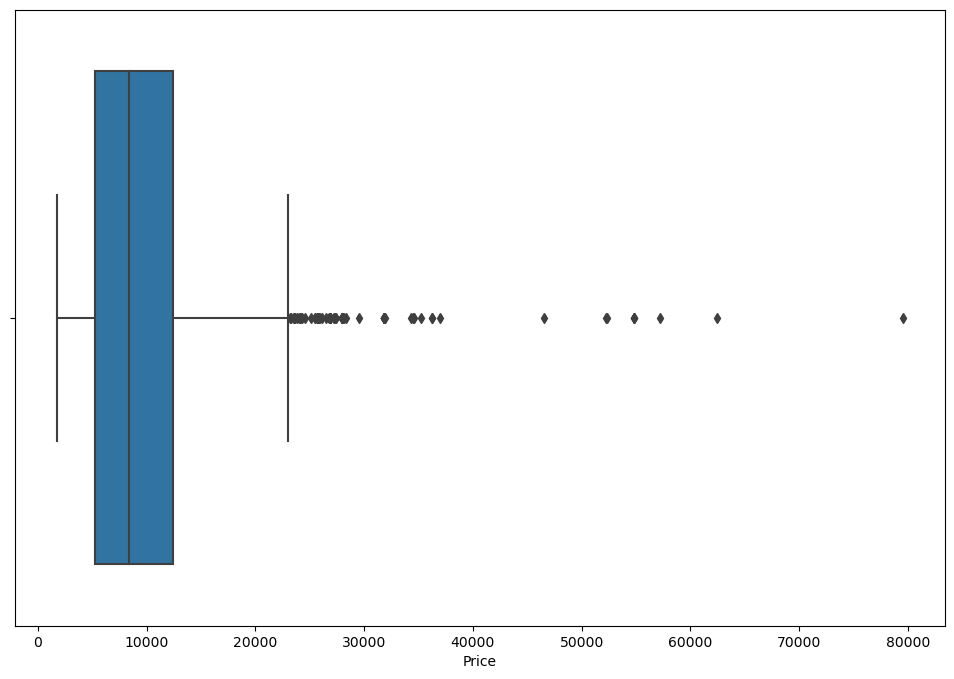

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_clean['Price'])
plt.show()

- Terdapat data pencilar pada kolom price maka dari itu harga yang di atas 40000 akan direplace dengan 40.000 (nilai terbesar di data baru) karena jika nilai diatas 40.000 rupee di replace dengan median maka tiket yang seharusnya mahal tidak lagi menjadi mahal.

In [27]:
df_clean['Price']=np.where(df_clean['Price']>40000,40000,df_clean['Price'])

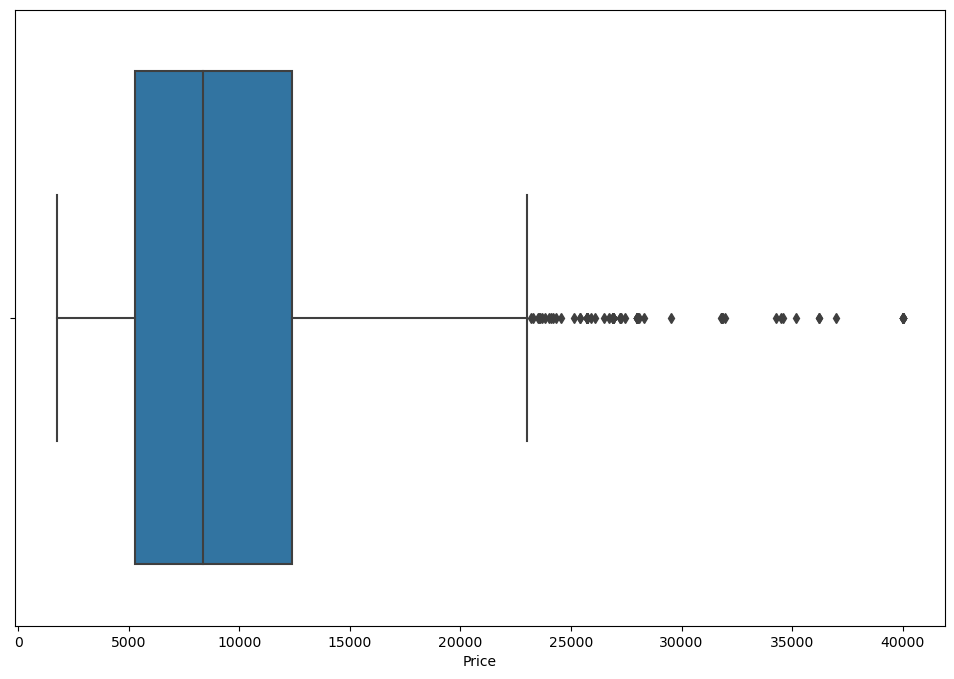

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_clean['Price'])
plt.show()

## 4. Exploratory Data Analysis 

### Analisis Univariate

#### Plot Kolom dengan Data Numerikal (Distplot)

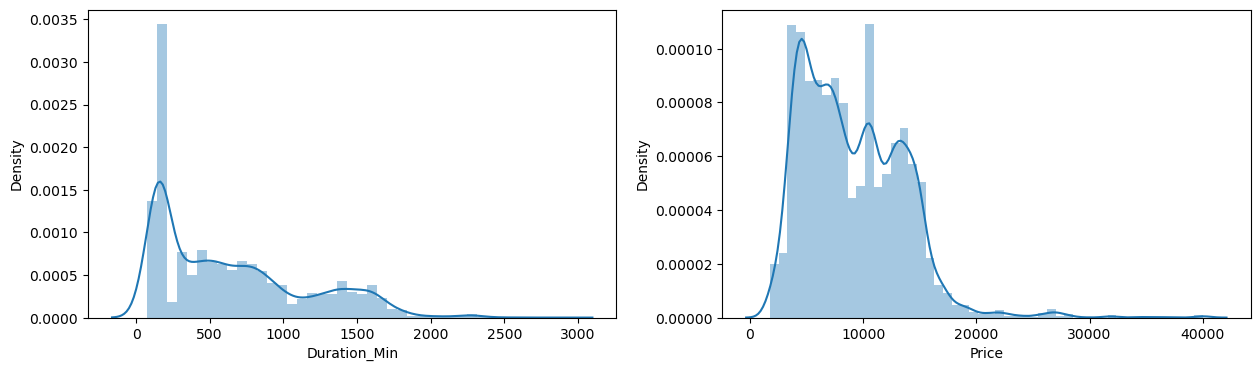

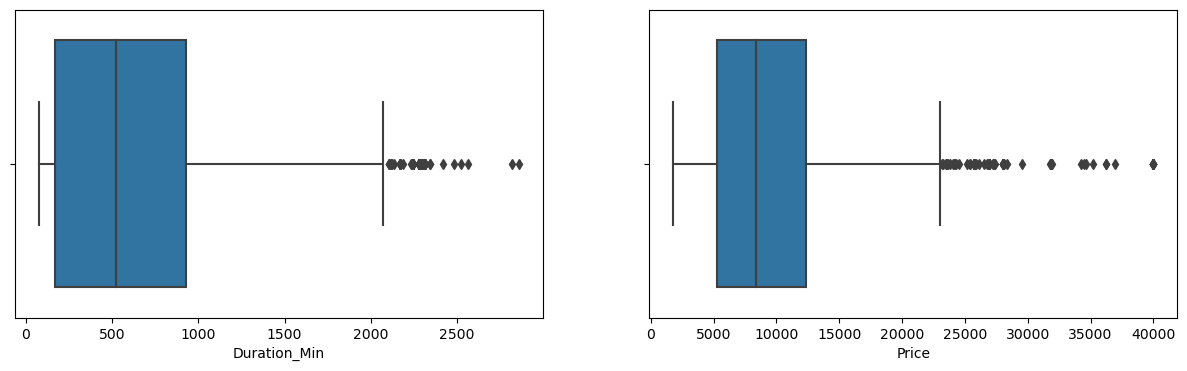

In [29]:
kol_num = ['Duration_Min', 'Price']
plt.figure(figsize=(15,4))
for i,kolom in enumerate (kol_num):
    plt.subplot(1,2,i+1)
    sns.distplot(x=df_clean[kolom],axlabel=kolom)

plt.figure(figsize=(15,4))
for i,kolom in enumerate (kol_num):
    plt.subplot(1,2,i+1)
    sns.boxplot(x=df_clean[kolom])
plt.show()

#### Plot Kolom dengan Data Kategorikal (Barplot)

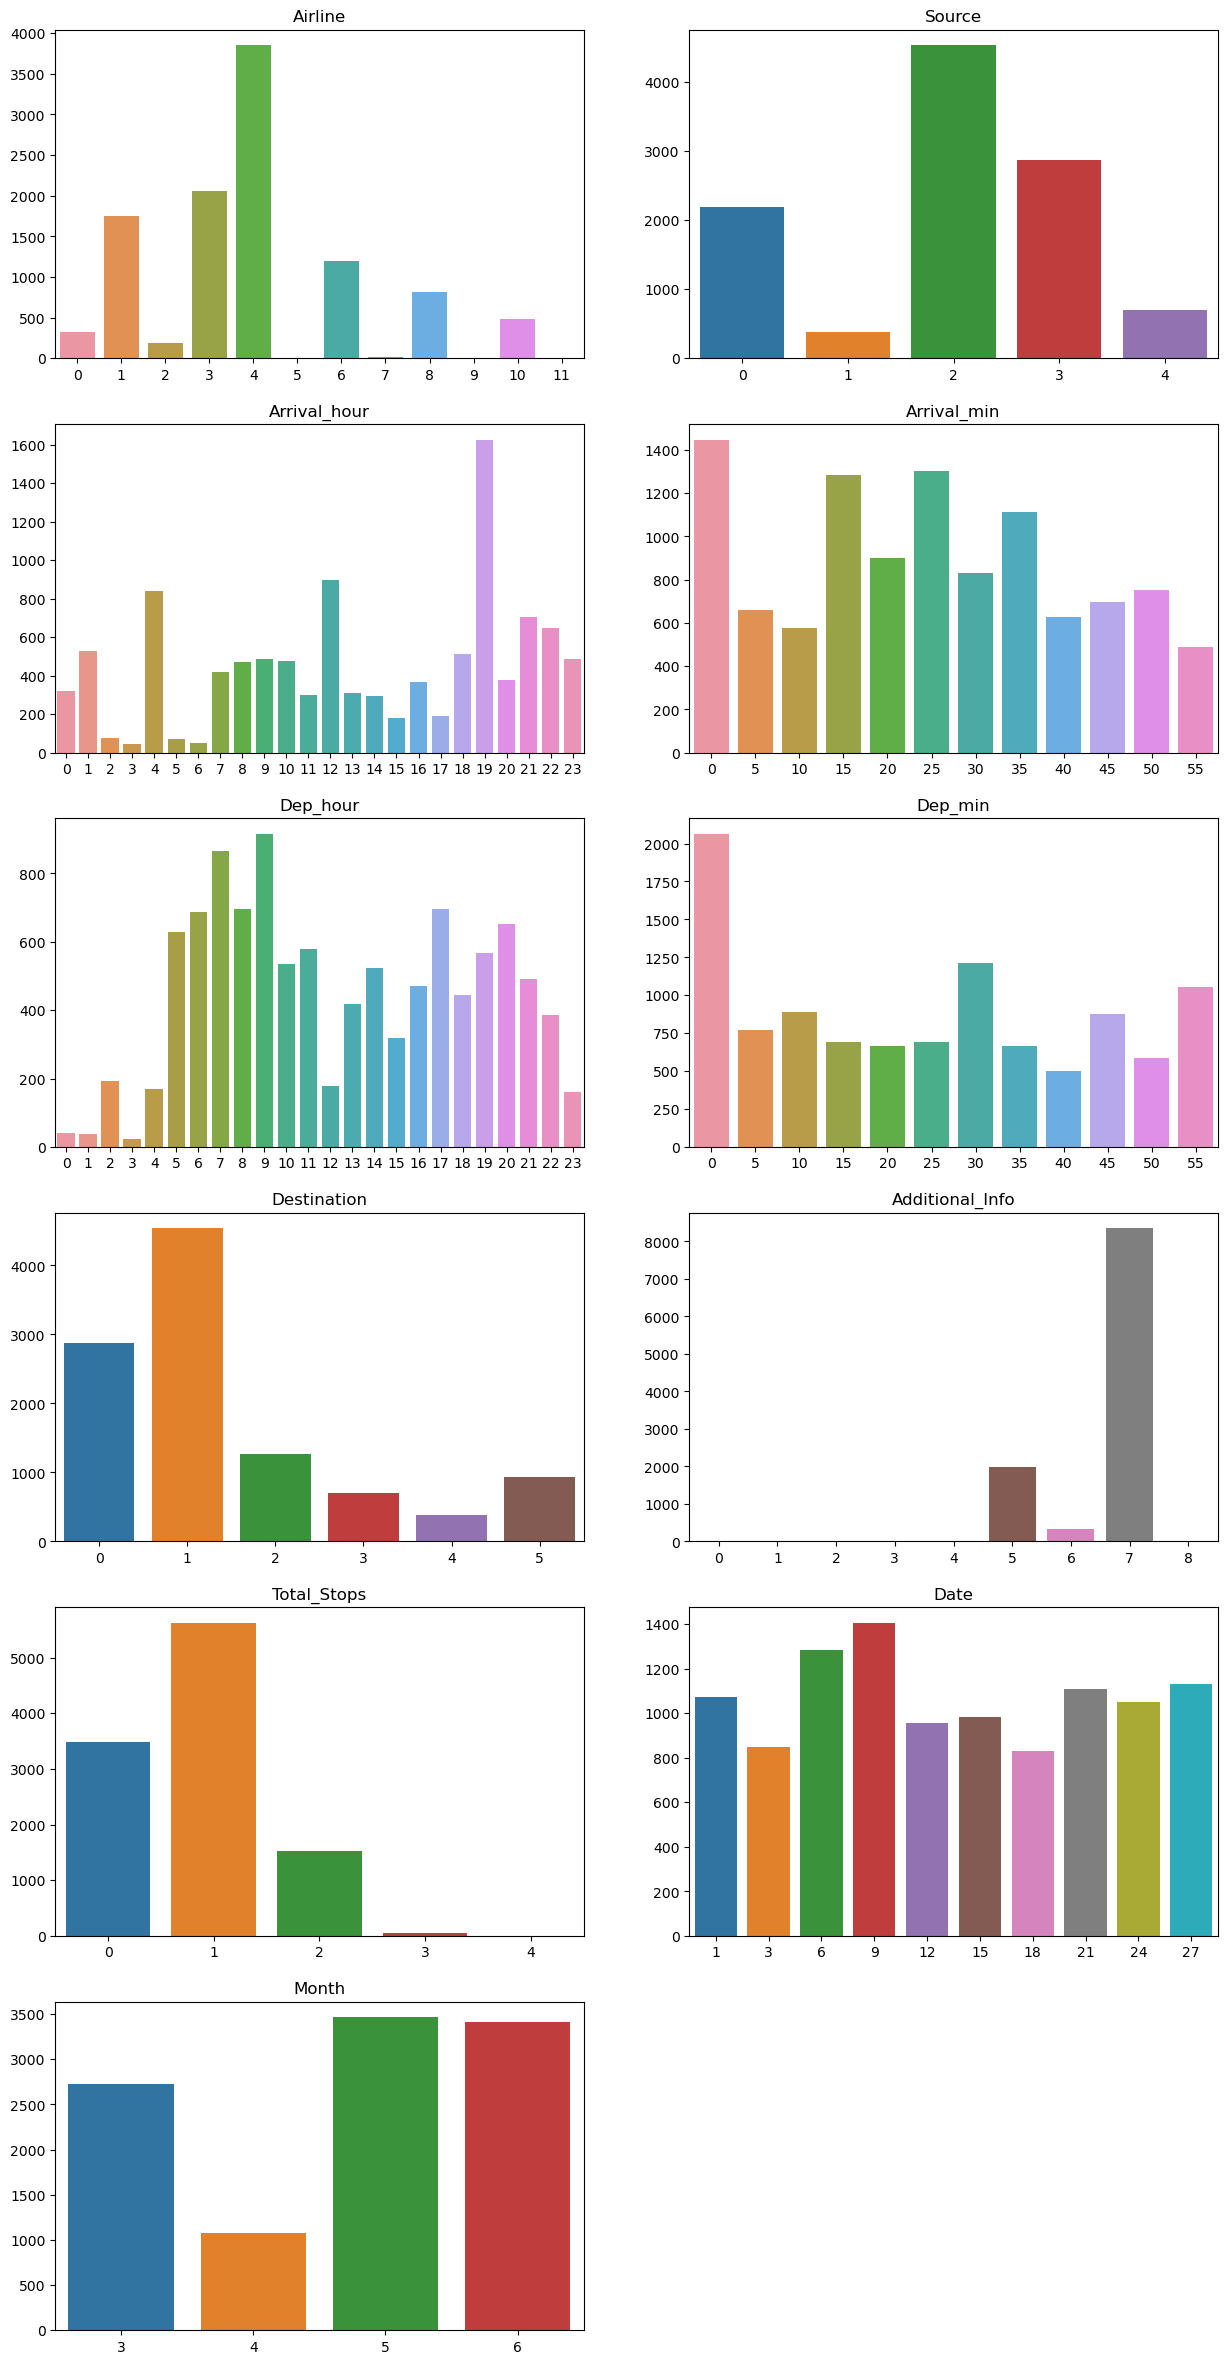

In [30]:
kol_kat = ['Airline', 'Source', 'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min',
           'Destination','Additional_Info','Total_Stops','Date', 'Month']
plt.figure(figsize=(15,35))
for i,kolom in enumerate (kol_kat):
    dat = df_clean[kolom].value_counts()
    Index = dat.index
    Value = dat.values
    plt.subplot(7,2,i+1)
    sns.barplot(x=Index,y=Value).set_title(kolom)
plt.show()

#### Analisis Plot Univariate

- Pada distplot pada kolom dengan data numerik :
    - Lama penerbangan : pelanggan melakukan perjalanan pada menit adalah 60-2000 menit dalam satu kali perjalanan. 
    - Harga tiket pesawat (Rupee) : Pada Histogram, persebaran harganya adalah pada rentang 2000 - 23000 rupee


- Pada barplot untuk kolom kategorik :
    
    - Dep hour : Jam paling banyak terjadi keberangkatan pesawat adalah pada jam 12 siang dan 19 malam.
    - Arrival hour : Waktu kedatangan pesawat paling banyak adalah pada pagi dan malam
    - Airline : Tiga maskapai paling banyak digunakan adalah Jet Airways, IndiGo, dan Air India
    - source : Delhi adalah kota dengan keberangkatan pesawat paling banyak
    - Destination : Cochin adalah kota yang paling bayak dikunjungi
    - Additional info : Kebanyakan dari data tidak memiliki informasi tambahan pada penerbangan
    - Total stop : Kebanyakan dari pesawat melakukan satu kali transit


### Analysis Bivariate

- Melakukan sorting data berdasarkan harga paling mahal untuk melihat nilai beberapa kolom dengan harga tertinggi dan terendah

In [31]:
prices = df_clean.sort_values(by=['Price'],ascending=False).reset_index()
prices

,index,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Min,Price
0,7350,5,2,1,2,7,3,3,2019,4,25,20,5,500,40000
1,10362,5,0,5,1,3,1,3,2019,14,25,9,45,280,40000
2,9713,5,2,1,2,7,6,3,2019,4,25,20,5,500,40000
3,657,5,0,5,1,7,1,3,2019,10,45,5,45,300,40000
4,2924,5,0,5,1,3,1,3,2019,11,25,5,45,340,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,1513,4,4,3,0,5,27,3,2019,4,25,2,55,90,1840
10677,4274,8,4,3,0,7,27,3,2019,0,10,22,45,85,1759
10678,4839,8,4,3,0,7,3,4,2019,0,15,22,45,90,1759
10679,10511,8,4,3,0,7,27,3,2019,7,5,5,45,80,1759


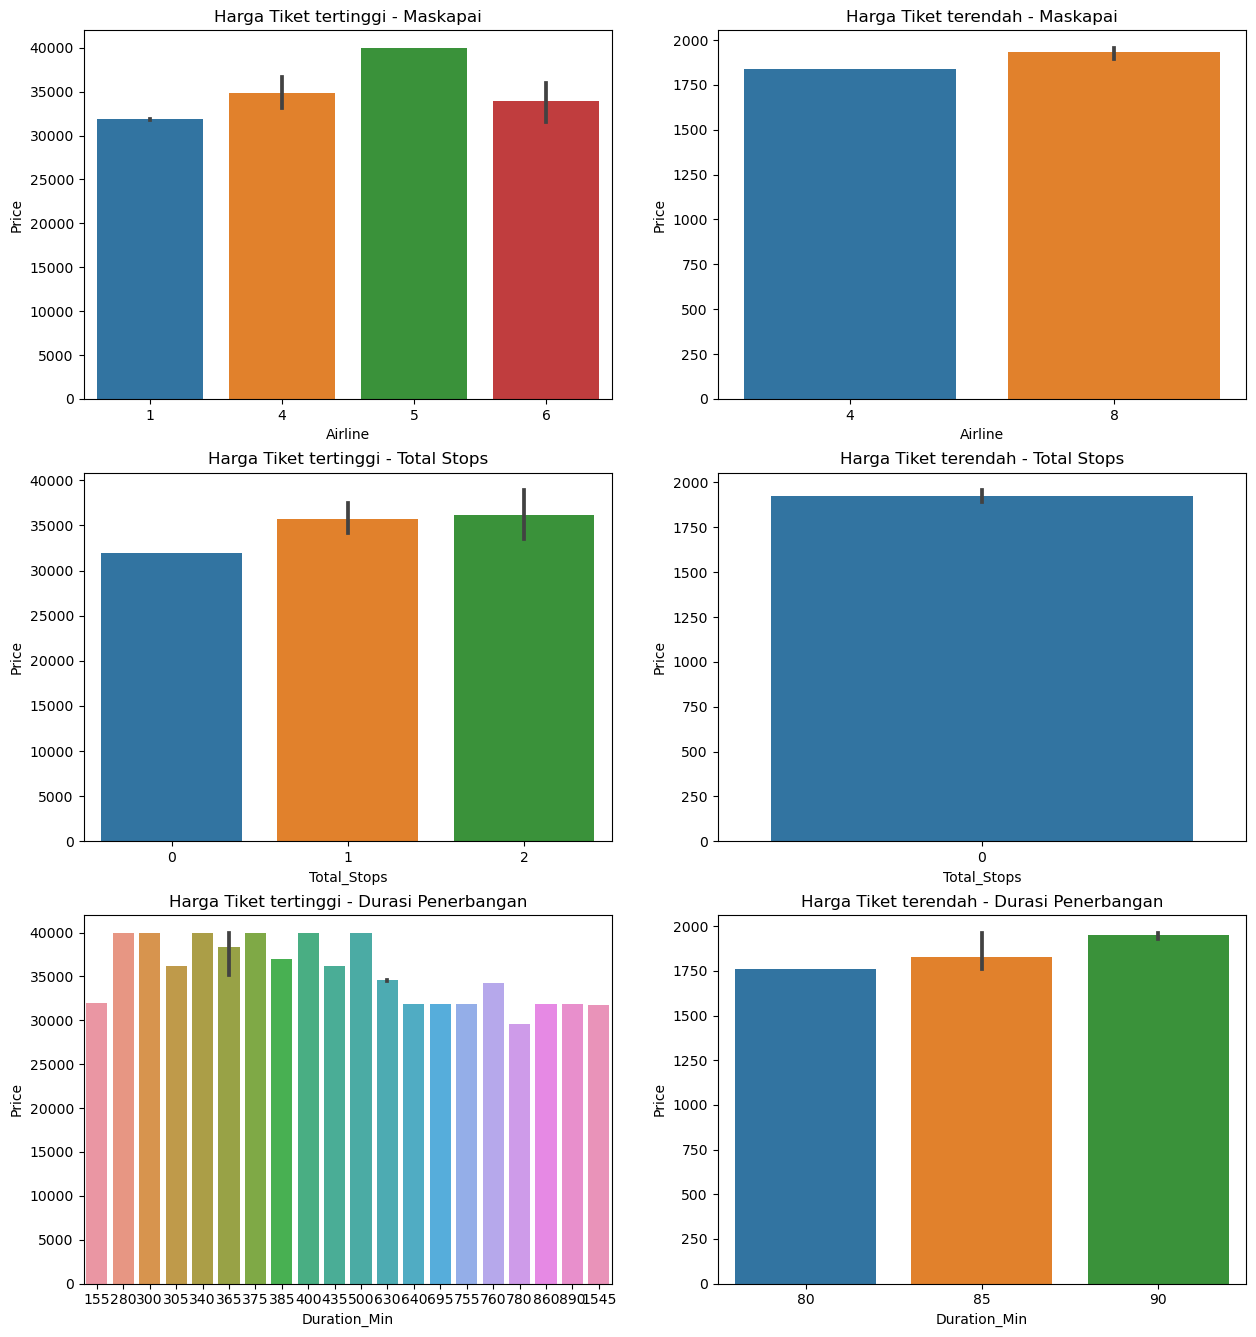

In [32]:
fig,ax = plt.subplots(figsize=(15,45))

plt.subplot(8,2,1)
sns.barplot(x='Airline', y='Price', data=prices.head(25)).set(title='Harga Tiket tertinggi - Maskapai')
plt.subplot(8,2,2)
sns.barplot(x='Airline', y='Price', data=prices.tail(25)).set(title='Harga Tiket terendah - Maskapai')
plt.subplot(8,2,3)
sns.barplot(x='Total_Stops', y='Price', data=prices.head(25)).set(title='Harga Tiket tertinggi - Total Stops')
plt.subplot(8,2,4)
sns.barplot(x='Total_Stops', y='Price', data=prices.tail(25)).set(title='Harga Tiket terendah - Total Stops')
plt.subplot(8,2,5)
sns.barplot(x='Duration_Min', y='Price', data=prices.head(25)).set(title='Harga Tiket tertinggi - Durasi Penerbangan')
plt.subplot(8,2,6)
sns.barplot(x='Duration_Min', y='Price', data=prices.tail(25)).set(title='Harga Tiket terendah - Durasi Penerbangan')
plt.show()

- Memperbesar grafik duration minute harga tiket tertinggi

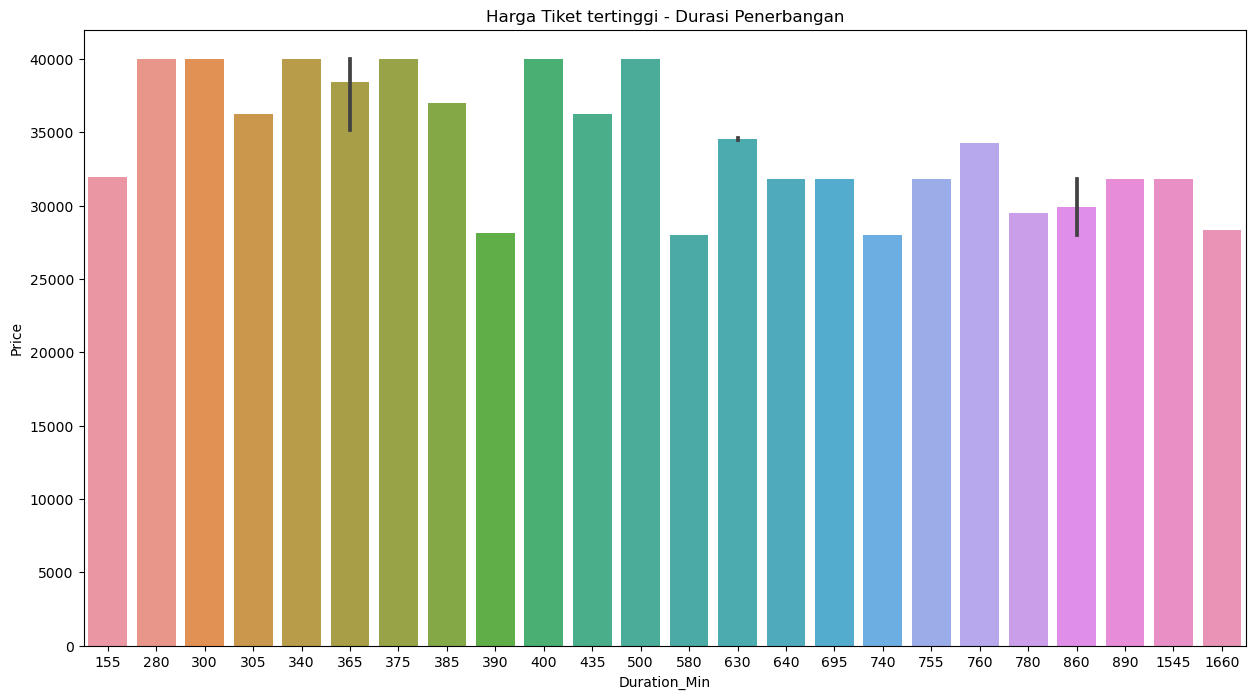

In [33]:
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x='Duration_Min', y='Price', data=prices.head(30)).set(title='Harga Tiket tertinggi - Durasi Penerbangan')
plt.show()

 - Pada plot bivariate diatas dapat dilihat :
     
     
     - Maskapai dengan harga tiket paling mahal adalah Jet Airways Business, diikuti dengan Multiple Carriers, Jet Airways, serta Air India sedangkan harga tiket terendah dimiliki oleh maskapai Jet Airways SpiceJet dan Jet Airways. Dari hasil ini kemungkinan Jet Airways memiliki kategori tiket yang sangat mahal juga yang terjangkau sedangkan pada maskapai Jet Airways Business hanya memiliki tiket kategori mahal.
     
     -  Banyak berhenti/transit pesawat dengan harga tiket termahal adalah 2 kali sedangkan untuk banyak berhenti/transit tiket termurah adalah 0 atau tidak ada berhenti / transit.
     
     - Lama penerbangan dengan harga tiket tertinggi terdapat pada  rentang waktu 155-1660 menit sedangkan untukk tiket termurah pada rentang 80 - 90 menit.

### Multivariate Analysis

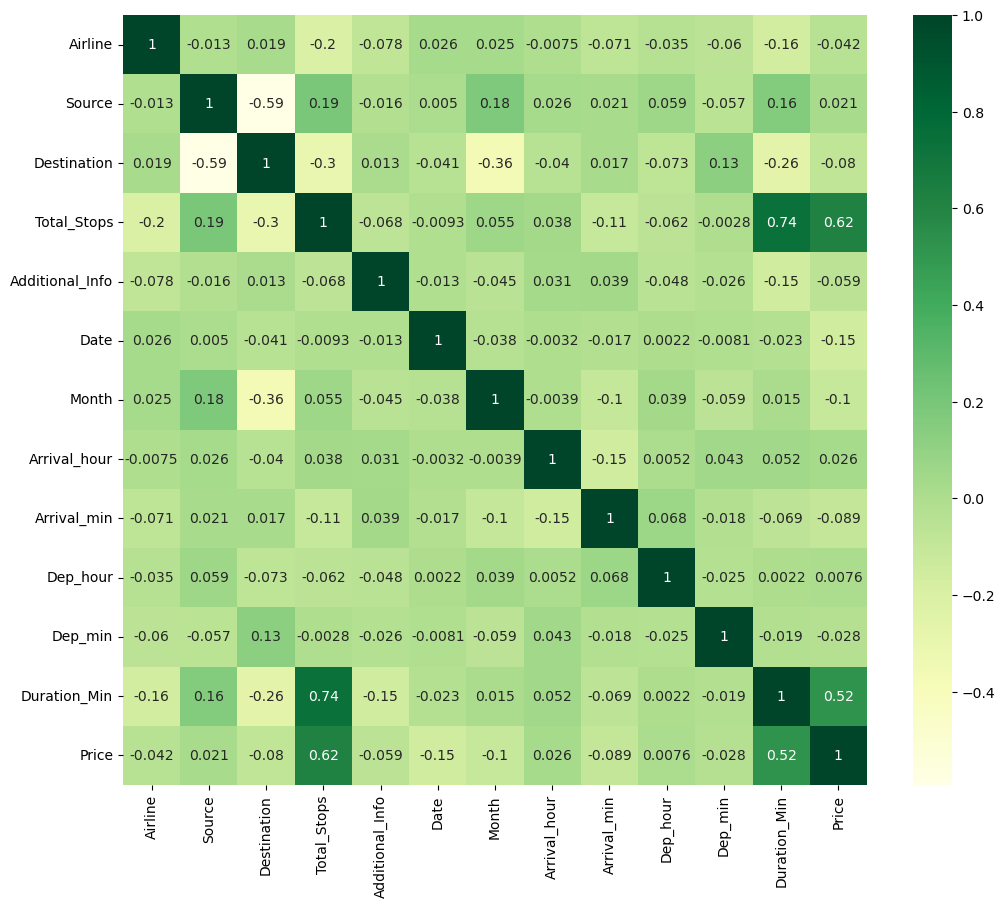

In [34]:
plt.figure(figsize=(12,10))

#Membuat dataset tanpa tahun karena tahun data ini diambil adalah 2019
df_hm = df_clean.drop('Year',axis=1)
sns.heatmap(df_hm.corr(), annot=True, fmt='.2g', cmap='YlGn')
plt.show()

-  Pada plot multivariate diatas dapat dilihat :
     
     - Korelasi antar variabel kebanyakan adalah korelasi negatif, kecuali untuk korelasi antara :
         - Harga tiket dengan total stop/transit
         - Harga tiket dengan lama waktu di perjalanan
         - Lama waktu di perjalanan dengan total stop/transit

## 5. Membuat model prediksi regresi

#### Menginput dataframe untuk data yang akan diprediksi dengan model

In [35]:
df_pred = pd.read_excel('Airplane Ticket Prize_Test Set.xlsx')
df_pred

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


#### Membuat fungsi untuk merubah dataframe seperti dengan dataframe train

In [36]:
def cleaning_data(data):
    df_clean = data.copy()
    
    #Mencacah data
    df_clean['Date']  = df_clean['Date_of_Journey'].str.split('/').str[0]
    df_clean['Month'] = df_clean['Date_of_Journey'].str.split('/').str[1]
    df_clean['Year']  = df_clean['Date_of_Journey'].str.split('/').str[2]

    #Mengubah tipe data
    df_clean['Date']  = df_clean['Date'].astype(int)
    df_clean['Month'] = df_clean['Month'].astype(int)
    df_clean['Year']  = df_clean['Year'].astype(int)
    
    #Menghilangkan hari dibelakang data
    df_clean['Arrival_Time'] = df_clean['Arrival_Time'].str.split(' ').str[0]

    #Mencacah data
    df_clean['Arrival_hour']=df_clean['Arrival_Time'].str.split(':').str[0]
    df_clean['Arrival_min']=df_clean['Arrival_Time'].str.split(':').str[1]

    #Mengubah Tipe data
    df_clean['Arrival_hour']=df_clean['Arrival_hour'].astype(int)
    df_clean['Arrival_min']=df_clean['Arrival_min'].astype(int)
    
    #Mencacah data
    df_clean['Dep_hour'] = df_clean['Dep_Time'].str.split(':').str[0]
    df_clean['Dep_min']  = df_clean['Dep_Time'].str.split(':').str[1]

    #Mengubah tipe data
    df_clean['Dep_hour'] = df_clean['Dep_hour'].astype(int)
    df_clean['Dep_min']  = df_clean['Dep_min'].astype(int)
    
    df_clean = df_clean.dropna()
    
    df_clean['Total_Stops'] = df_clean['Total_Stops'].map({'non-stop':0,
                                                       '1 stop':1,
                                                       '2 stops':2,
                                                       '3 stops':3,
                                                       '4 stops':4})
    
    #menghapus row Duration dengan value == 5m
    indexMin = df_clean[(df_clean['Duration']=='5m')].index
    df_clean = df_clean.drop(indexMin)

    #mereset index
    df_clean = df_clean.reset_index(drop=True)
    
    #Memisah jam dari kolom duration
    jam = (df_clean['Duration'].str.split(' ').str[0]).str.replace('h', '')
    #mengubah data type menjadi int
    jam = jam.astype('int64')
    #mengubah jam menjadi menit
    jam = [x*60 for x in jam]

    #Memisah menit dari kolom duration
    menit = df_clean['Duration'].str.split(' ').str[1].str.replace('m', '')
    #mengubah data NaN karena tidak ada string H di kolomnya
    menit = menit.fillna('0')

    #mengubah data type menjadi int
    menit = menit.astype('int64')

    list_menit = jam+menit
    
    df_clean['Duration_Min'] = list_menit
    
    df_clean['Additional_Info'] = df_clean['Additional_Info'].str.lower()
    
    df_clean = df_clean.drop('Date_of_Journey',axis=1)
    df_clean = df_clean.drop('Route',axis=1)
    df_clean = df_clean.drop('Dep_Time',axis=1)
    df_clean = df_clean.drop('Arrival_Time',axis=1)
    df_clean = df_clean.drop('Duration',axis=1)
    
    LE=LabelEncoder()

    df_clean['Airline']=LE.fit_transform(df_clean['Airline'])
    print(f'Airline label = {list(LE.classes_)}')
    df_clean['Source']=LE.fit_transform(df_clean['Source'])
    print(f'Source label = {list(LE.classes_)}')
    df_clean['Destination']=LE.fit_transform(df_clean['Destination'])
    print(f'Destination = {list(LE.classes_)}')
    df_clean['Additional_Info']=LE.fit_transform(df_clean['Additional_Info'])
    print(f'Additional_info = {list(LE.classes_)}')
    
    return df_clean

In [37]:
dfp_clean = cleaning_data(df_pred)

Airline label = ['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Vistara', 'Vistara Premium economy']
Source label = ['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai']
Destination = ['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']
Additional_info = ['1 long layover', 'business class', 'change airports', 'in-flight meal not included', 'no check-in baggage included', 'no info']


#### Data bersih harga tiket pesawat untuk ditest

In [38]:
dfp_clean

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Min
0,4,2,1,1,5,6,6,2019,4,25,17,30,655
1,3,3,0,1,5,12,5,2019,10,20,6,20,240
2,4,2,1,1,3,21,5,2019,19,0,19,15,1425
3,6,2,1,1,5,21,5,2019,21,0,8,0,780
4,0,0,2,0,5,24,6,2019,2,45,23,55,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,1,3,0,1,5,6,6,2019,20,25,20,30,1435
2666,3,3,0,0,5,27,3,2019,16,55,14,20,155
2667,4,2,1,1,5,6,3,2019,4,25,21,50,395
2668,1,2,1,1,5,6,3,2019,19,15,4,0,915


#### Data bersih harga tiket pesawat untuk training

In [39]:
df_clean

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_Min,Price
0,3,0,5,0,7,24,3,2019,1,10,22,20,170,3897
1,1,3,0,2,7,1,5,2019,13,15,5,50,445,7662
2,4,2,1,2,7,9,6,2019,4,25,9,25,1140,13882
3,3,3,0,1,7,12,5,2019,23,30,18,5,325,6218
4,3,0,5,1,7,1,3,2019,21,35,16,50,285,13302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,0,3,0,0,7,9,4,2019,22,25,19,55,150,4107
10677,1,3,0,0,7,27,4,2019,23,20,20,45,155,4145
10678,4,0,2,0,7,27,4,2019,11,20,8,20,180,7229
10679,10,0,5,0,7,1,3,2019,14,10,11,30,160,12648


## Pembuatan model

- Pada dataset ini prediksi yang akan kita buat adalah prediksi regresi


- Berikut adalah beberapa algoritma yang digunakan untuk melakukan prediksi regresi:

    
    - Linear Regression
    - Ridge Regression
    - Neural Network Regression 
    - Lasso Regression 
    - Decision Tree Regression 
    - Random Forest Regressor
    - KNN Regressor
    - Support Vector Machines (SVM)
    - Gausian Regression
    - Polynomial Regression


- Yang akan kita coba gunakan untuk data ini adalah algoritma KNN Regressor, Decision Tree Regression, dan Random Forest Regressor

### Memisahkan data training dan testing

In [40]:
X=df_clean.drop(columns=['Price'],axis=1)
y=df_clean['Price']

# Memisahkan data training dan test menjadi 70% traning dan 30% testing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=13)

In [41]:
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### Membuat model K-Nearest Neighbors Regressor

In [42]:
model_knr = KNR(n_neighbors=2,
                weights='uniform',
                leaf_size=300).fit(X_train, y_train)

In [43]:
y_pred_knr = model_knr.predict(X_test)

print("Training score: {}".format(model_knr.score(X_train,y_train)))
print(f"r2 score = {r2_score(y_test,y_pred_knr)}")
print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_knr)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_knr)}")
print(f"Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_knr))}")

Training score: 0.8737153789770995
r2 score = 0.5684680219431584
Mean Absolute Error = 1782.1664586583463
Mean Squared Error = 9233492.26450858
Root Mean Squared Error = 3038.666198269988


#### Melakukan prediksi pada data test Airplane Price dengan model KNN Regressor

In [44]:
dfp_clean1 = dfp_clean.copy()

X1 = dfp_clean1
y1_pred_knr = model_knr.predict(X1)

y1_pred_knr = y1_pred_knr.round()

dfp_clean1['Price'] = y1_pred_knr

dfp_clean1['Price'] = dfp_clean1['Price'].astype('int64')

### Membuat model Decission Tree Regressor

In [45]:
model_dtr = DTR(criterion='squared_error',
                min_samples_leaf= 2,
                min_weight_fraction_leaf= 0.0007,
                splitter= 'best',
                random_state=13).fit(X_train, y_train)

In [46]:
y_pred_dtr = model_dtr.predict(X_test)

print("Training score: {}".format(model_dtr.score(X_train,y_train)))
print(f"r2 score = {r2_score(y_test,y_pred_dtr)}")
print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_dtr)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_dtr)}")
print(f"Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_dtr))}")

Training score: 0.9138507278581111
r2 score = 0.8318963549577053
Mean Absolute Error = 887.9143057237442
Mean Squared Error = 3596914.6785438685
Root Mean Squared Error = 1896.5533682298183


#### Melakukan prediksi pada data test Airplane Price dengan model Decission Tree Regressor

In [47]:
dfp_clean2 = dfp_clean.copy()

X2 = dfp_clean2
y2_pred_dtr = model_dtr.predict(X2)

y2_pred_dtr = y2_pred_dtr.round()

dfp_clean2['Price'] = y2_pred_dtr

dfp_clean2['Price'] = dfp_clean2['Price'].astype('int64')

### Membuat model dengan algoritma RandomForrest Regressor

In [48]:
model_rfr = RFR(n_estimators = 250,
                max_features= 'auto',
                max_depth = 20).fit(X_train, y_train)

In [49]:
y_pred_rfr = model_rfr.predict(X_test)

print("Training score: {}".format(model_rfr.score(X_train,y_train)))
print(f"r2 score = {r2_score(y_test,y_pred_rfr)}")
print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_rfr)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_rfr)}")
print(f"Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_rfr))}")

Training score: 0.9828640031743221
r2 score = 0.8895202029689554
Mean Absolute Error = 681.6939178268517
Mean Squared Error = 2363936.864804625
Root Mean Squared Error = 1537.5099560017895


#### Melakukan prediksi pada data test Airplane Price dengan model Random Forrest Regressor

In [50]:
dfp_clean3 = dfp_clean.copy()

X3 = dfp_clean3
y3_pred_rfr = model_rfr.predict(X3)

y3_pred_rfr = y3_pred_rfr.round()

dfp_clean3['Price'] = y3_pred_rfr

dfp_clean3['Price'] = dfp_clean3['Price'].astype('int64')

## 6. Evaluasi Model

### Model KNeighbors Regressor

In [51]:
print("Training score: {}".format(model_knr.score(X_train,y_train)))
print(f"r2 score = {r2_score(y_test,y_pred_knr)}")
print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_knr)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_knr)}")
print(f"Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_knr))}")

Training score: 0.8737153789770995
r2 score = 0.5684680219431584
Mean Absolute Error = 1782.1664586583463
Mean Squared Error = 9233492.26450858
Root Mean Squared Error = 3038.666198269988


### Model Decission Tree Regressor

In [52]:
print("Training score: {}".format(model_dtr.score(X_train,y_train)))
print(f"r2 score = {r2_score(y_test,y_pred_dtr)}")
print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_dtr)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_dtr)}")
print(f"Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_dtr))}")

Training score: 0.9138507278581111
r2 score = 0.8318963549577053
Mean Absolute Error = 887.9143057237442
Mean Squared Error = 3596914.6785438685
Root Mean Squared Error = 1896.5533682298183


### Model RandomForrestRegressor

In [53]:
print("Training score: {}".format(model_rfr.score(X_train,y_train)))
print(f"r2 score = {r2_score(y_test,y_pred_rfr)}")
print(f"Mean Absolute Error = {mean_absolute_error(y_test,y_pred_rfr)}")
print(f"Mean Squared Error = {mean_squared_error(y_test,y_pred_rfr)}")
print(f"Root Mean Squared Error = {np.sqrt(mean_squared_error(y_test,y_pred_rfr))}")

Training score: 0.9828640031743221
r2 score = 0.8895202029689554
Mean Absolute Error = 681.6939178268517
Mean Squared Error = 2363936.864804625
Root Mean Squared Error = 1537.5099560017895


### Plot perbandingan y_test dan y_pred serta hasil prediksi di dataset untuk testing

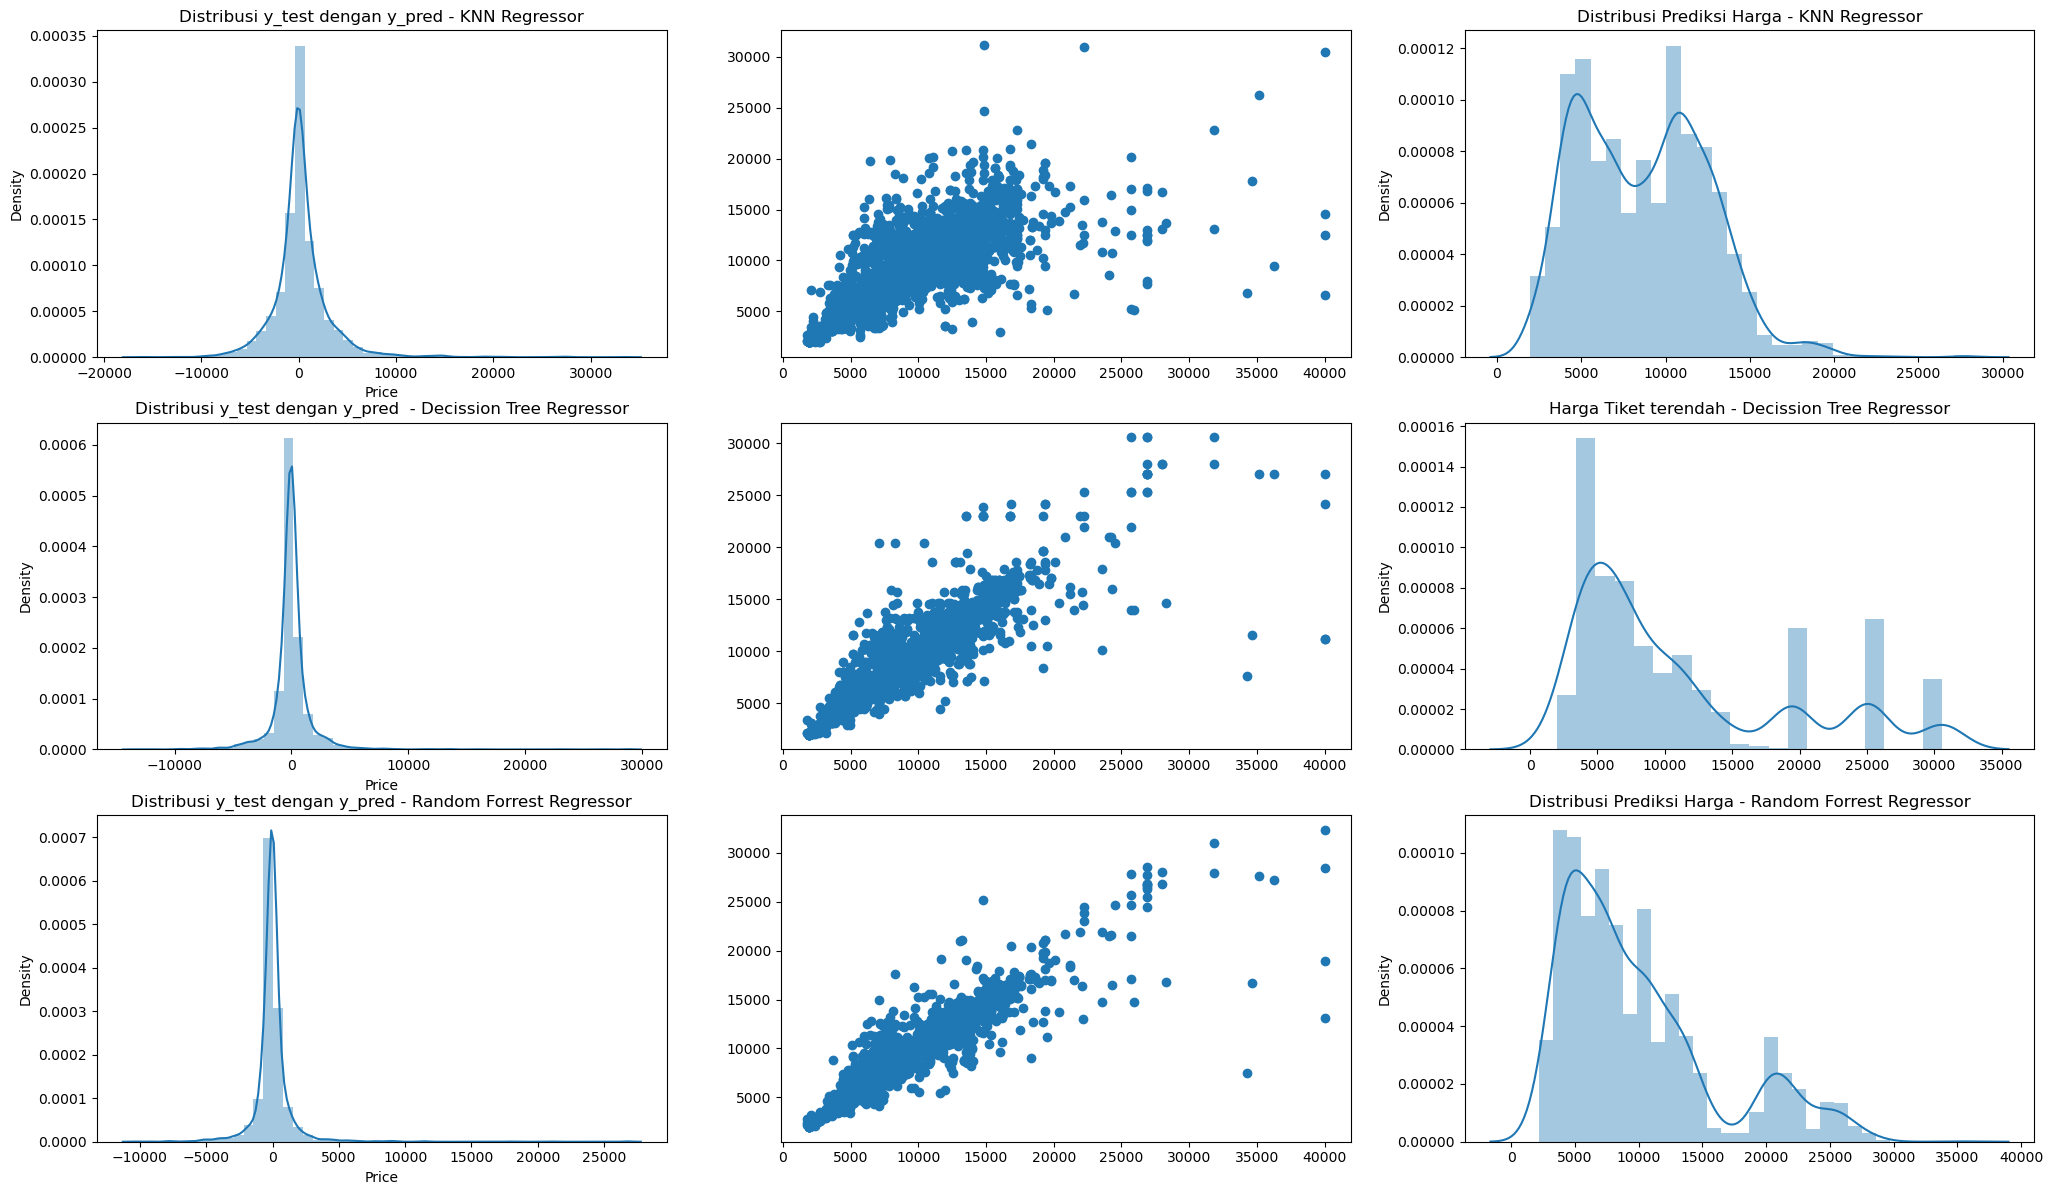

In [55]:
fig,ax = plt.subplots(figsize=(25,45))

plt.subplot(9,3,1)
sns.distplot(y_test-y_pred_knr).set(title='Distribusi y_test dengan y_pred - KNN Regressor')
plt.subplot(9,3,2)
plt.scatter(y_test,y_pred_knr)
plt.subplot(9,3,3)
sns.distplot(y1_pred_knr).set(title='Distribusi Prediksi Harga - KNN Regressor')

plt.subplot(9,3,4)
sns.distplot(y_test-y_pred_dtr).set(title='Distribusi y_test dengan y_pred  - Decission Tree Regressor')
plt.subplot(9,3,5)
plt.scatter(y_test,y_pred_dtr)
plt.subplot(9,3,6)
sns.distplot(y2_pred_dtr).set(title='Harga Tiket terendah - Decission Tree Regressor')

plt.subplot(9,3,7)
sns.distplot(y_test-y_pred_rfr).set(title='Distribusi y_test dengan y_pred - Random Forrest Regressor')
plt.subplot(9,3,8)
plt.scatter(y_test,y_pred_rfr)
plt.subplot(9,3,9)
sns.distplot(y3_pred_rfr).set(title='Distribusi Prediksi Harga - Random Forrest Regressor')
plt.show()

- Model 

### Plot Bivarate hasil prediksi untuk melihat maskapai dengan harga tiket terendah dan tertinggi pada masing-masing model

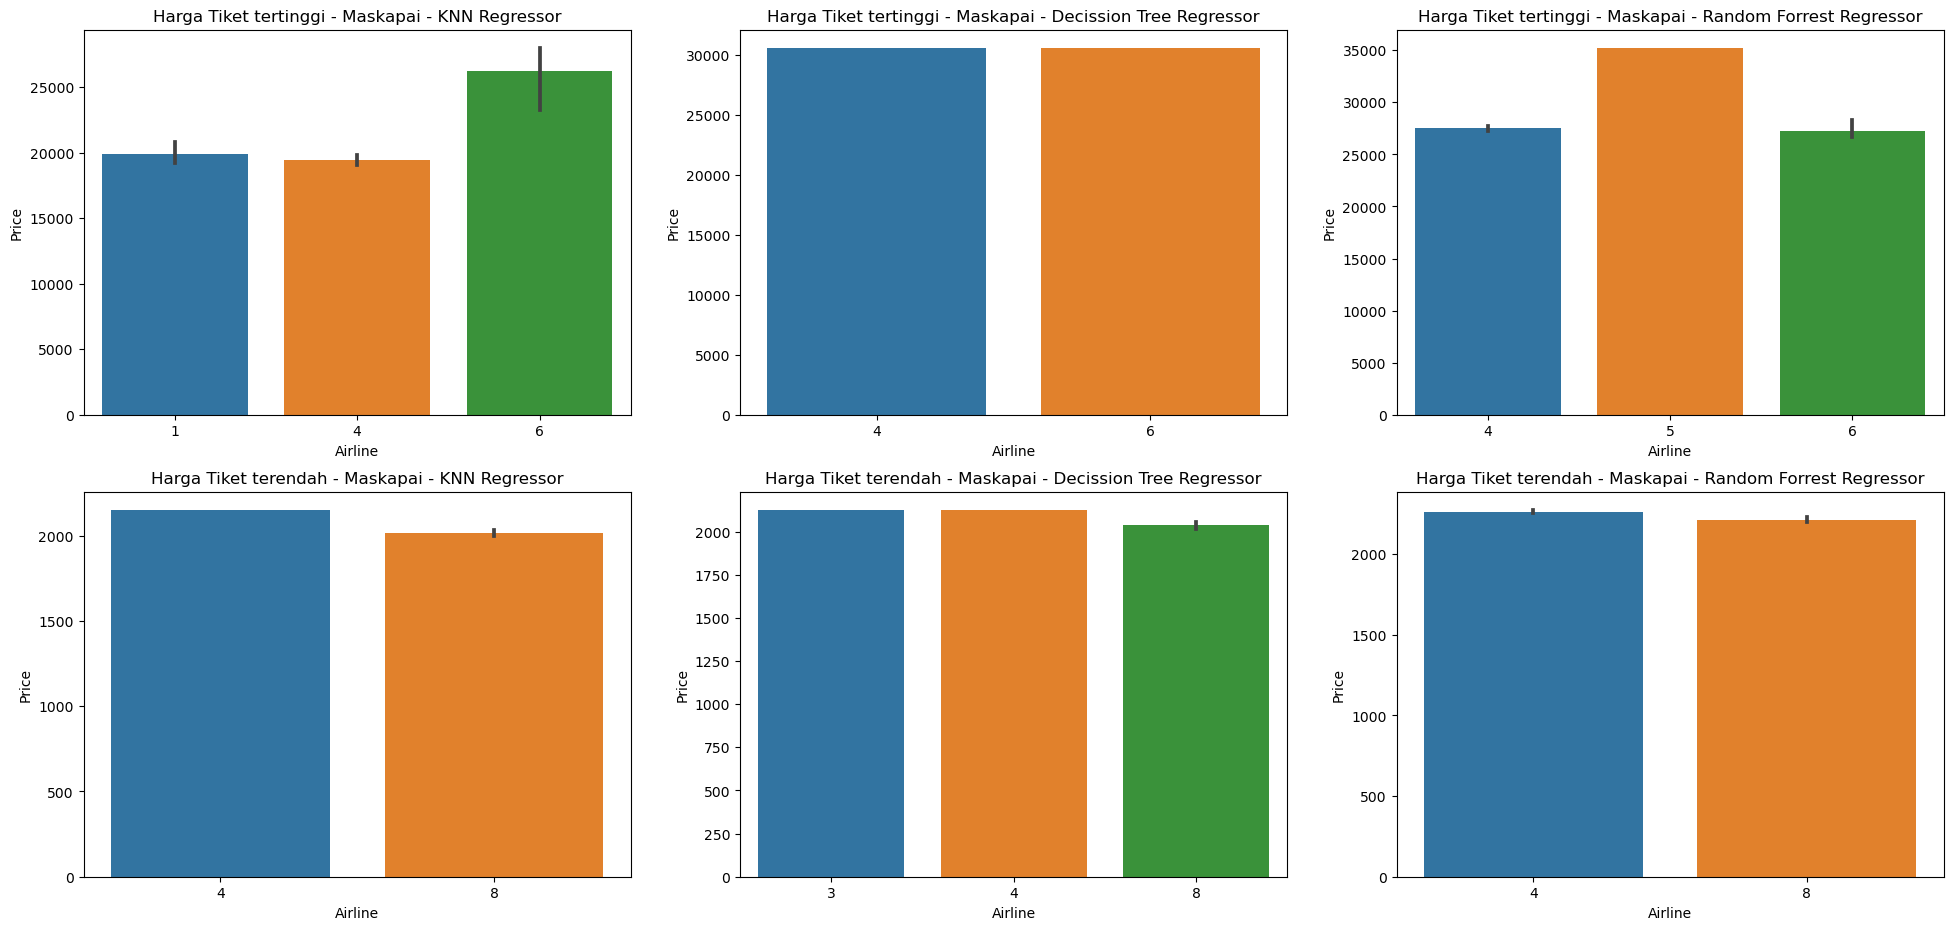

In [54]:
prices1 = dfp_clean1.sort_values(by=['Price'],ascending=False).reset_index()
prices2 = dfp_clean2.sort_values(by=['Price'],ascending=False).reset_index()
prices3 = dfp_clean3.sort_values(by=['Price'],ascending=False).reset_index()

fig,ax = plt.subplots(figsize=(24,35))

plt.subplot(6,3,1)
sns.barplot(x='Airline', y='Price', data=prices1.head(25)).set(title='Harga Tiket tertinggi - Maskapai - KNN Regressor')
plt.subplot(6,3,2)
sns.barplot(x='Airline', y='Price', data=prices2.head(25)).set(title='Harga Tiket tertinggi - Maskapai - Decission Tree Regressor')
plt.subplot(6,3,3)
sns.barplot(x='Airline', y='Price', data=prices3.head(25)).set(title='Harga Tiket tertinggi - Maskapai - Random Forrest Regressor')
plt.subplot(6,3,4)
sns.barplot(x='Airline', y='Price', data=prices1.tail(25)).set(title='Harga Tiket terendah - Maskapai - KNN Regressor')
plt.subplot(6,3,5)
sns.barplot(x='Airline', y='Price', data=prices2.tail(25)).set(title='Harga Tiket terendah - Maskapai - Decission Tree Regressor')
plt.subplot(6,3,6)
sns.barplot(x='Airline', y='Price', data=prices3.tail(25)).set(title='Harga Tiket terendah - Maskapai - Random Forrest Regressor')
plt.show()

## 7. Analisis

## 8. Kesimpulan

## Daftar Pustaka

- https://www.jigsawacademy.com/popular-regression-algorithms-ml/
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
- https://www.kaggle.com/code/marklvl/decision-tree-regressor-on-bike-sharing-dataset
- https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/
- https://towardsdatascience.com/3-techniques-to-avoid-overfitting-of-decision-trees-1e7d3d985a09
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=from+sklearn+tree+import+decisiontreeregressor
- https://www.kaggle.com/code/aniketyadav1/svm-and-hyper-parameter-tuning
- https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
- https://www.kaggle.com/datasets/jillanisofttech/flight-price-prediction-dataset
- https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/
- https://www.kaggle.com/code/aniketyadav1/svm-and-hyper-parameter-tuning
- https://stackoverflow.com/questions/48033510/tuning-parameters-for-svm-regression
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- https://www.jigsawacademy.com/popular-regression-algorithms-ml/
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html